# Adjust CSV

In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv(r"C:\Users\krish\ai-power-converter\machine-learning\simulation_results_8000.csv")

# Specify the columns you want to remove
columns_to_remove = ["No"]  # Specify the columns you want to remove

# Drop the specified columns
df_truncated = df.drop(columns=columns_to_remove)

# Save the truncated DataFrame back to a CSV file
df_truncated.to_csv("modified_8000_dataset.csv", index=False)


# Search N and H

C:\Users\Krishna\AppData\Local\Temp\ipykernel_46908\2870598341.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd






Epoch 1/50, Loss: 1.2756675481796265, Val Loss: 1.1509222984313965
Epoch 2/50, Loss: 0.7038180828094482, Val Loss: 0.5009525418281555
Epoch 3/50, Loss: 0.3103182017803192, Val Loss: 0.381025493144989
Epoch 4/50, Loss: 0.28375864028930664, Val Loss: 0.28847581148147583
Epoch 5/50, Loss: 0.2804994583129883, Val Loss: 0.2699836194515228
Epoch 6/50, Loss: 0.27906057238578796, Val Loss: 0.28051677346229553
Epoch 7/50, Loss: 0.27539554238319397, Val Loss: 0.2723149359226227
Epoch 8/50, Loss: 0.2762044072151184, Val Loss: 0.2745683193206787
Epoch 9/50, Loss: 0.27702683210372925, Val Loss: 0.26825660467147827
Epoch 10/50, Loss: 0.27431029081344604, Val Loss: 0.26664912700653076
Epoch 11/50, Loss: 0.2761988043785095, Val Loss: 0.26661217212677
Epoch 12/50, Loss: 0.2710307240486145, Val Loss: 0.2666727602481842
Epoch 13/50, Loss: 0.27062147855758667, Val Loss: 0.26463204622268677
Epoch 14/50, Loss: 0.27343058586120605, Val Loss: 0.2612385153770447
Epoch 15/50, Loss: 0.26943880319595337, Val 

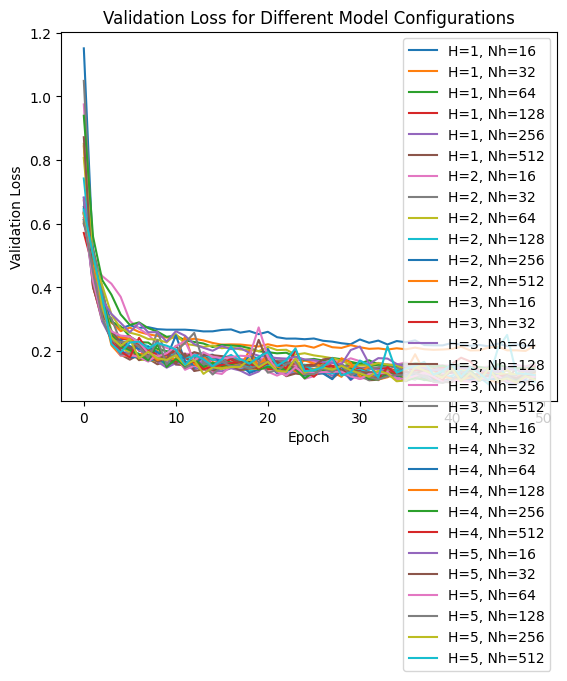

Model with H=1 and Nh=16:
MSE: 0.20129747688770294
MAE: 0.2012975011878931
RMSE: 0.490240137104116
R-squared: 0.829784521304973
MAPE: 17.903153661813512%
Model with H=1 and Nh=32:
MSE: 0.19588401913642883
MAE: 0.19588401364138952
RMSE: 0.6615249868561682
R-squared: 0.7974333417815735
MAPE: 14.87937704564658%
Model with H=1 and Nh=64:
MSE: 0.15466898679733276
MAE: 0.1546689864354267
RMSE: 0.4132999794445815
R-squared: 0.933263686524377
MAPE: 12.76411597834319%
Model with H=1 and Nh=128:
MSE: 0.14690254628658295
MAE: 0.14690252735207457
RMSE: 0.3995715191124346
R-squared: 0.9332743751533141
MAPE: 10.799353881429077%
Model with H=1 and Nh=256:
MSE: 0.13419067859649658
MAE: 0.1341906835734927
RMSE: 0.3725523631930254
R-squared: 0.9521196778300522
MAPE: 10.331710254428945%
Model with H=1 and Nh=512:
MSE: 0.1398875117301941
MAE: 0.1398874959886745
RMSE: 0.3369834163065441
R-squared: 0.947897822797145
MAPE: 11.551414279340099%
Model with H=2 and Nh=16:
MSE: 0.1448575109243393
MAE: 0.144857511

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Fix random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load your simulation data
# Replace "your_dataset.csv" with the path to your dataset
df = pd.read_csv(r"D:\Krishna\ai-power-converter\dataset\modified_8000_dataset.csv")

# Extract input features (L, C, fsw)
X = df[['L', 'C', 'fsw']].values

# Extract output (ripples)
y = df[["delta_current", "delta_voltage", "Pl_s1", "Pl_s2", "Pl_C", "Pl_L_Cu"]].values  # Adjust column names as per your dataset

# Scale input features to range [0, 1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define a custom callback to print custom information at the end of each epoch
class PrintEpochInfo(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}/{self.params['epochs']}, Loss: {logs['loss']}, Val Loss: {logs['val_loss']}")

# Initialize a dictionary to store the training history for each configuration
histories = {}

# Initialize dictionaries to store the evaluation metrics for each configuration
mses = {}
maes = {}
rmses = {}
r2_scores = {}
mapes = {}

# Define a list of different values for H and Nh to try
# H_values = [1, 2, 3, 4, 5]  # Number of hidden layers
# Nh_values = [32, 64, 128]  # Number of neurons per hidden layer
# Additional values for H and Nh
# H_values = [1, 2, 3, 4, 5, 6, 7]  # Number of hidden layers
# Nh_values = [16, 32, 64, 128, 256]  # Number of neurons per hidden layer
H_values = [1, 2, 3, 4, 5]  # Number of hidden layers
Nh_values = [16, 32, 64, 128, 256, 512]  # Number of neurons per hidden layer



# Iterate over different values of H and Nh
for H in H_values:
    for Nh in Nh_values:
        # Initialize a Sequential model
        model = tf.keras.Sequential()

        # Add the first hidden layer with batch normalization
        model.add(tf.keras.layers.Dense(Nh, activation='relu', input_shape=(3,)))  
        model.add(tf.keras.layers.BatchNormalization())

        # Add subsequent hidden layers with batch normalization
        for _ in range(H - 1):
            model.add(tf.keras.layers.Dense(Nh, activation='relu'))
            model.add(tf.keras.layers.BatchNormalization())

        # Output layer (assuming it follows the hidden layers)
        model.add(tf.keras.layers.Dense(6, activation='softplus'))  

        # Compile the model
        model.compile(optimizer='adam', loss='mean_absolute_error')

        # Train the model and store the training history
        history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=0, callbacks=[PrintEpochInfo()])
        histories[(H, Nh)] = history

        # Evaluate the model on the testing set
        predictions = model.predict(X_test)

        # Evaluate the model on the testing set and calculate MSE
        mse = model.evaluate(X_test, y_test)
        mses[(H, Nh)] = mse

        # Calculate Mean Absolute Error (MAE)
        mae = mean_absolute_error(y_test, predictions)
        maes[(H, Nh)] = mae

        # Calculate Root Mean Squared Error (RMSE)
        rmse = np.sqrt(mean_squared_error(y_test, predictions))
        rmses[(H, Nh)] = rmse

        # Calculate R-squared (R2) Score
        r2 = r2_score(y_test, predictions)
        r2_scores[(H, Nh)] = r2

        # Calculate Mean Absolute Percentage Error (MAPE)
        mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
        mapes[(H, Nh)] = mape

# Plot the validation loss for each configuration
for (H, Nh), history in histories.items():
    plt.plot(history.history['val_loss'], label=f'H={H}, Nh={Nh}')

plt.title('Validation Loss for Different Model Configurations')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

# Print the MSE for each configuration
# Print the evaluation metrics for each configuration
for (H, Nh), mse in mses.items():
    print(f'Model with H={H} and Nh={Nh}:')
    print(f'MSE: {mse}')
    print(f'MAE: {maes[(H, Nh)]}')
    print(f'RMSE: {rmses[(H, Nh)]}')
    print(f'R-squared: {r2_scores[(H, Nh)]}')
    print(f'MAPE: {mapes[(H, Nh)]}%')


## Ranking

In [2]:
import os
import pandas as pd

# Sort configurations based on MSE in ascending order
sorted_configs_mse = sorted(mses.items(), key=lambda x: x[1])

# Sort configurations based on MAE in ascending order
sorted_configs_mae = sorted(maes.items(), key=lambda x: x[1])

# Sort configurations based on RMSE in ascending order
sorted_configs_rmse = sorted(rmses.items(), key=lambda x: x[1])

# Sort configurations based on R-squared in descending order
sorted_configs_r2 = sorted(r2_scores.items(), key=lambda x: x[1], reverse=True)

# Sort configurations based on MAPE in ascending order
sorted_configs_mape = sorted(mapes.items(), key=lambda x: x[1])

# Rank each combination based on its position in the sorted lists
ranking = {}
for i, (config, _) in enumerate(sorted_configs_mse):
    ranking[config] = i + 1

# for i, (config, _) in enumerate(sorted_configs_mae):
#     ranking.setdefault(config, 0)
#     ranking[config] += i + 1

# for i, (config, _) in enumerate(sorted_configs_rmse):
#     ranking.setdefault(config, 0)
#     ranking[config] += i + 1

# for i, (config, _) in enumerate(sorted_configs_r2):
#     ranking[config] += i + 1

# for i, (config, _) in enumerate(sorted_configs_mape):
#     ranking[config] += i + 1

# Sort configurations based on their overall ranking
sorted_ranking = sorted(ranking.items(), key=lambda x: x[1])

# Display the rankings
for rank, (config, _) in enumerate(sorted_ranking, 1):
    print(f'{rank}. Combination {config}: Overall rank {rank}')



# # Create the 'ranking' folder if it doesn't exist
# folder_path = 'ranking'
# if not os.path.exists(folder_path):
#     os.makedirs(folder_path)

# # Create a DataFrame for the rankings
# rankings_df = pd.DataFrame(sorted_ranking, columns=['Combination', 'Overall_Rank'])

# # Define the file path for saving the CSV file
# file_path = os.path.join(folder_path, 'rankings_7.csv')

# # Save the DataFrame to a CSV file
# rankings_df.to_csv(file_path, index=False)

# print(f"Rankings saved to '{file_path}'")


1. Combination (5, 256): Overall rank 1
2. Combination (4, 256): Overall rank 2
3. Combination (2, 128): Overall rank 3
4. Combination (3, 64): Overall rank 4
5. Combination (2, 256): Overall rank 5
6. Combination (4, 512): Overall rank 6
7. Combination (5, 512): Overall rank 7
8. Combination (3, 256): Overall rank 8
9. Combination (4, 32): Overall rank 9
10. Combination (3, 128): Overall rank 10
11. Combination (5, 64): Overall rank 11
12. Combination (2, 512): Overall rank 12
13. Combination (3, 512): Overall rank 13
14. Combination (4, 16): Overall rank 14
15. Combination (4, 128): Overall rank 15
16. Combination (5, 128): Overall rank 16
17. Combination (2, 64): Overall rank 17
18. Combination (5, 32): Overall rank 18
19. Combination (5, 16): Overall rank 19
20. Combination (3, 32): Overall rank 20
21. Combination (1, 256): Overall rank 21
22. Combination (3, 16): Overall rank 22
23. Combination (2, 32): Overall rank 23
24. Combination (4, 64): Overall rank 24
25. Combination (1, 5

## Try spesific N and H

In [7]:
# Specify the combination you want to call
H = 3
Nh = 128

# Retrieve the model for the specified combination
selected_model = histories[(H, Nh)].model

# Use the trained model to make predictions on the testing set
predictions = selected_model.predict(X_test)

# Print the first few predictions
print("Predictions:")
print(predictions[:5])

# Print the corresponding true values
print("True Values:")
print(y_test[:5])

38/38 [==============================] - 0s 540us/step
Predictions:
[[0.25476933 6.043111   2.713843   2.7003171  0.01315323 1.3389459 ]
 [0.16585797 3.906833   3.613402   3.6306283  0.00762289 1.0406684 ]
 [0.19883841 6.4134398  3.5143807  3.4990919  0.00750189 1.3380339 ]
 [0.09718067 4.4454546  2.4264638  2.418702   0.0226757  2.283144  ]
 [0.05906398 0.03266384 1.9580728  1.9356045  0.18203364 2.3493981 ]]
True Values:
[[0.26001435 4.23264405 2.74299141 2.74299141 0.01217656 1.29224261]
 [0.19503469 3.32206237 3.59940991 3.59940991 0.00902757 0.95760415]
 [0.23933468 4.23420079 3.51435724 3.51435724 0.00733677 1.291914  ]
 [0.08042573 4.24613856 2.40471154 2.40471154 0.02217949 2.34150863]
 [0.07897327 0.58997409 2.02413572 2.02413572 0.16765618 2.15456352]]


# Machine Learning

Epoch 1/50
175/175 [==============================] - 1s 2ms/step - loss: 1.2312 - val_loss: 1.8220
Epoch 2/50
175/175 [==============================] - 0s 1ms/step - loss: 0.7014 - val_loss: 0.9146
Epoch 3/50
175/175 [==============================] - 0s 1ms/step - loss: 0.5161 - val_loss: 0.4631
Epoch 4/50
175/175 [==============================] - 0s 1ms/step - loss: 0.4439 - val_loss: 0.3551
Epoch 5/50
175/175 [==============================] - 0s 1ms/step - loss: 0.3981 - val_loss: 0.2742
Epoch 6/50
175/175 [==============================] - 0s 1ms/step - loss: 0.3696 - val_loss: 0.2336
Epoch 7/50
175/175 [==============================] - 0s 1ms/step - loss: 0.3615 - val_loss: 0.2677
Epoch 8/50
175/175 [==============================] - 0s 1ms/step - loss: 0.3536 - val_loss: 0.2804
Epoch 9/50
175/175 [==============================] - 0s 1ms/step - loss: 0.3828 - val_loss: 0.2224
Epoch 10/50
175/175 [==============================] - 0s 1ms/step - loss: 0.3367 - val_loss: 0.2040

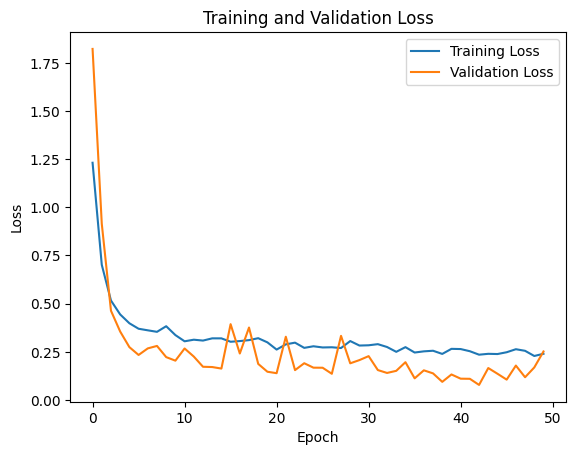

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

# Load your simulation data
# Replace "your_dataset.csv" with the path to your dataset
df = pd.read_csv(r"D:\Krishna\ai-power-converter\dataset\modified_8000_dataset.csv")

# Extract input features (L, C, fsw)
X = df[['L', 'C', 'fsw']].values

# Extract output (ripples)
y = df[["delta_current", "delta_voltage", "Pl_s1", "Pl_s2", "Pl_C", "Pl_L_Cu"]].values  # Adjust column names as per your dataset

# Scale input features to range [0, 1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define a custom callback to print custom information at the end of each epoch
class PrintEpochInfo(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}/{self.params['epochs']}, Loss: {logs['loss']}, Val Loss: {logs['val_loss']}")


model = tf.keras.Sequential([
    tf.keras.layers.BatchNormalization(input_shape=(3,)),  # Scalarization layer
    tf.keras.layers.Dense(128, activation='relu'),          # Hidden layer 1
    tf.keras.layers.BatchNormalization(),                  # Batch normalization
    tf.keras.layers.Dense(128, activation='relu'),          # Hidden layer 2
    tf.keras.layers.BatchNormalization(),                  # Batch normalization
    tf.keras.layers.Dense(128, activation='relu'),          # Hidden layer 2
    tf.keras.layers.BatchNormalization(),         
    tf.keras.layers.Dense(6, activation='softplus')                               # Output layer with 6 neurons
])

# model = tf.keras.Sequential([
#     tf.keras.layers.BatchNormalization(input_shape=(3,)),  # Scalarization layer
#     tf.keras.layers.Dense(512, activation='relu'),          # Hidden layer 1
#     tf.keras.layers.BatchNormalization(),                  # Batch normalization
#     tf.keras.layers.Dense(512, activation='relu'),          # Hidden layer 2
#     tf.keras.layers.BatchNormalization(),                  # Batch normalization
#     tf.keras.layers.Dense(512, activation='relu'),          # Hidden layer 2
#     tf.keras.layers.BatchNormalization(),         
#     tf.keras.layers.Dense(512, activation='relu'),          # Hidden layer 2
#     tf.keras.layers.BatchNormalization(),                  # Batch normalization
#     tf.keras.layers.Dense(512, activation='relu'),          # Hidden layer 2
#     tf.keras.layers.BatchNormalization(),         
#     tf.keras.layers.Dense(6, activation='softplus')                               # Output layer with 6 neurons
# ])


# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with custom callback to print information at the end of each epoch
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[PrintEpochInfo()], verbose=1)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Testing Set

In [7]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# Evaluate the model on the testing set
mse = model.evaluate(X_test, y_test)
print("Mean Squared Error on Testing Set:", mse)

# Use the trained model to make predictions on the testing set
predictions = model.predict(X_test)

# Print the first few predictions
print("Predictions:")
print(predictions[:5])

# Print the corresponding true values
print("True Values:")
print(y_test[:5])

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate R-squared (R2) Score
r2 = r2_score(y_test, predictions)
print(f'R-squared (R2) Score: {r2}')

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

38/38 [==============================] - 0s 606us/step - loss: 0.1632
Mean Squared Error on Testing Set: 0.16320562362670898
38/38 [==============================] - 0s 499us/step
Predictions:
[[0.20654827 6.483947   2.6345077  2.6322153  0.01708872 1.3133281 ]
 [0.12445674 4.282261   3.5189834  3.520649   0.00829306 1.0214925 ]
 [0.14707306 6.546033   3.3875675  3.4100778  0.00850959 1.2893308 ]
 [0.06795892 4.3753366  2.3814638  2.3742485  0.01889426 2.3163981 ]
 [0.06067272 0.20301414 2.079679   2.104424   0.14704187 2.053334  ]]
True Values:
[[0.26001435 4.23264405 2.74299141 2.74299141 0.01217656 1.29224261]
 [0.19503469 3.32206237 3.59940991 3.59940991 0.00902757 0.95760415]
 [0.23933468 4.23420079 3.51435724 3.51435724 0.00733677 1.291914  ]
 [0.08042573 4.24613856 2.40471154 2.40471154 0.02217949 2.34150863]
 [0.07897327 0.58997409 2.02413572 2.02413572 0.16765618 2.15456352]]
Mean Absolute Error (MAE): 0.13914263041641098
Root Mean Squared Error (RMSE): 0.4039871578126952
R-sq

## Save Model

In [ ]:
# Evaluate the model on the testing set
mse = model.evaluate(X_test, y_test)
print("Mean Squared Error on Testing Set:", mse)

# Optionally, save the model
model.save("ripples_prediction_model.h5")
